# Exploratory Data Analysis Using Python


*Analyzing responses from the Stack Overflow Annual Developer Survey 2020*

## Introduction

In this Jupyter notebook we'll analyze the StackOverflow developer survey dataset. The dataset contains responses to an annual survey conducted by StackOverflow. You can find the raw data & official analysis here: https://insights.stackoverflow.com/survey.

In order to get the data into Jupyter we will use a Python library called [`opendatasets`](https://pypi.org/project/opendatasets/), which allows us to download datasets from online sources such as Kaggle and Google Drive, using a simple Python command.

In [1]:
pip install opendatasets --upgrade

Requirement already up-to-date: opendatasets in /opt/anaconda3/lib/python3.8/site-packages (0.1.10)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import opendatasets as od

In [3]:
od.download('stackoverflow-developer-survey-2020')

94609408it [00:12, 9383977.01it/s]                               
0it [00:00, ?it/s]


16384it [00:00, 52071.73it/s]           

0it [00:00, ?it/s]


8192it [00:00, 27703.01it/s]            
94609408it [00:30, 9383977.01it/s]

Let's verify that the dataset was downloaded into the directory `stackoverflow-developer-survey-2020` and retrieve the list of files in the dataset.

In [4]:
import os

In [5]:
os.listdir('stackoverflow-developer-survey-2020')

['survey_results_public.csv', 'survey_results_schema.csv', 'README.txt']

You can view the downloaded files using the "File" > "Open" menu option in Jupyter. It seems that the dataset contains three files:

- `README.txt` - Information about the dataset
- `survey_results_schema.csv` - The list of questions, and shortcodes for each question
- `survey_results_public.csv` - The full list of responses to the questions 

Let's load the CSV files using the Pandas library. We'll use the name `survey_raw_df` for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.

In [6]:
import pandas as pd

In [7]:
survey_raw_df = pd.read_csv('stackoverflow-developer-survey-2020/survey_results_public.csv')

In [8]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


The dataset contains over 64,000 responses to 60 questions (although many questions are optional). The responses have been anonymized to remove personally identifiable information, and each respondent has been assigned a randomized respondent ID.

Let's view the list of columns in the data frame. 

In [9]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

It appears that shortcodes for questions have been used as column names. 

We can refer to the schema file to see the full text of each question. The schema file contains only two columns: `Column` and `QuestionText`. We can load it as a Pandas Series with `Column` as the index and the  `QuestionText` as the value.

In [10]:
schema_fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname, index_col='Column').QuestionText

We can now use `schema_raw` to retrieve the full question text for any column in `survey_raw_df`.

In [11]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [12]:
schema_raw['NEWEdImpt']

'How important is a formal education, such as a university degree in computer science, to your career?'

We've now loaded the dataset. Now we can start with preprocessing & cleaning the data for our analysis.

## Data Preparation & Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions

Let's select a subset of columns with the relevant data for our analysis.

In [13]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [14]:
len(selected_columns)

20

Let's extract a copy of the data from these columns into a new data frame `survey_df`. We can continue to modify further without affecting the original data frame.

In [15]:
survey_df = survey_raw_df[selected_columns].copy()

We can also view the full questions for all the columns we are interested in

In [16]:
schema = schema_raw[selected_columns]

In [17]:
schema

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

Let's view some basic information about the data frame.

In [18]:
survey_df.shape

(64461, 20)

In [19]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

Most columns have the data type `object`, either because they contain values of different types or contain empty values (`NaN`). It appears that every column contains some empty values since the Non-Null count for every column is lower than the total number of rows (64461). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis. 

Only two of the columns were detected as numeric columns (`Age` and `WorkWeekHrs`), even though a few other columns have mostly numeric values. To make our analysis easier, let's convert some other columns into numeric data types while ignoring any non-numeric value. The non-numeric values are converted to `NaN`.

In [20]:
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors='coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

Let's now view some basic statistics about the numeric columns.

In [21]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


There seems to be a problem with the age column, as the minimum value is 1 and the maximum is 279. This is a common issue with surveys: responses may contain invalid values due to accidental or intentional errors while responding. A simple fix would be to ignore the rows where the age is higher than 100 years or lower than 10 years as invalid survey responses. We can do this using the `.drop` method.

In [22]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace=True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace=True)

The same holds for `WorkWeekHrs`. Let's ignore entries where the value for the column is higher than 140 hours. (~20 hours per day).

In [23]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace=True)

The gender column also allows for picking multiple options. We'll remove values containing more than one option to simplify our analysis.

In [24]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [25]:
import numpy as np

In [26]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

We've now cleaned up and prepared the dataset for analysis. Let's take a look at a sample of rows from the data frame.

In [27]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
17212,United States,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18.0,8.0,2.0,Go;JavaScript;Scala;SQL,Dart;Go;HTML/CSS;JavaScript;Rust;Scala;SQL,Every few months,Visit Stack Overflow,Employed full-time,"Developer, back-end;Engineer, data",45.0,Slightly satisfied,Specific department or team I’d be working on;...,Often: 1-2 days per week or more,Very important
53776,India,21.0,Man,Some college/university study without earning ...,"Another engineering discipline (such as civil,...",Yes,14.0,6.0,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;HTML/C...,Go;Java;JavaScript;Kotlin;R;SQL,Every few months,Call a coworker or friend;Visit Stack Overflow...,Student,NaN,NaN,NaN,Flex time or a flexible schedule;How widely us...,NaN,NaN
37505,Pakistan,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,C;C++;HTML/CSS,Java;JavaScript;Python;Swift,Every few months,NaN,Retired,NaN,NaN,NaN,NaN,NaN,NaN
9095,Pakistan,27.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,19.0,9.0,5.0,Go;JavaScript;SQL,JavaScript;Python;Rust;SQL,Every few months,Visit Stack Overflow;Do other work and come ba...,Employed full-time,"Developer, back-end",44.0,Slightly satisfied,Flex time or a flexible schedule;How widely us...,Often: 1-2 days per week or more,Somewhat important
8673,Russian Federation,35.0,Man,"Professional degree (JD, MD, etc.)","Computer science, computer engineering, or sof...",Yes,14.0,20.0,14.0,C;Java;Kotlin;SQL,Kotlin;Rust,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Engineering manager",40.0,Slightly satisfied,Flex time or a flexible schedule;Remote work o...,Occasionally: 1-2 days per quarter but less th...,Somewhat important
2232,United States,25.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,16.0,9.0,1.0,HTML/CSS;Java;Rust;SQL;TypeScript,HTML/CSS;Java;JavaScript;Rust;SQL,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Developer, QA or test",40.0,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",Never,Very important
47528,Chile,29.0,Man,"Associate degree (A.A., A.S., etc.)","Information systems, information technology, o...",Yes,18.0,8.0,5.0,Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScr...,HTML/CSS;JavaScript;PHP;SQL;TypeScript;VBA,Once every few years,Call a coworker or friend;Visit Stack Overflow,Employed full-time,"Developer, back-end;Developer, desktop or ente...",8.0,Very dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Never,Not at all important/not necessary
53680,India,20.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,11.0,5.0,NaN,Assembly;C++;Python,Assembly;C++;HTML/CSS;JavaScript;Python;TypeSc...,Every few months,Play games;Visit Stack Overflow;Go for a walk ...,Student,NaN,NaN,NaN,NaN,NaN,NaN
33031,Romania,38.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,7.0,31.0,15.0,C#;Java,C#;Go;Java;Rust,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack",32.0,Slightly satisfied,Flex time or a flexible schedule;Remote work o...,Often: 1-2 days per week or more,Very important
9183,India,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Web development or web design,Yes,20.0,2.0,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;SQL,Java;JavaScript;Kotlin;SQL,Every few months,Visit Stack Overflow;Watch help / tutorial videos,"Independent contractor, freelancer, or self-em...","Developer, full-stack;Developer, mobile",NaN,Neither satisfied nor dissatisfied,Remote work options;Opportunities for

## Exploratory Analysis and Visualization

Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community. A survey of this scale generally tends to have some selection bias.

Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [28]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Country

Let's look at the number of countries from which there are responses in the survey and plot the ten countries with the highest number of responses.

In [29]:
schema.Country

'Where do you live?'

In [30]:
survey_df.Country.nunique()

183

We can identify the countries with the highest number of respondents using the `value_counts` method.

In [31]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

We can visualize this information using a bar chart.

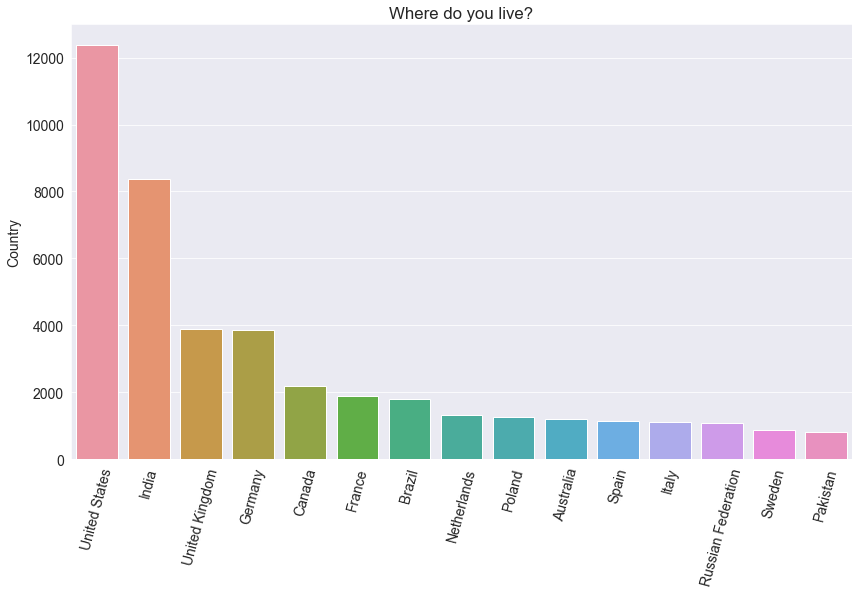

In [32]:
plt.figure(figsize=(14,8))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

It appears that a disproportionately high number of respondents are from the US and India, probably because the survey is in English, and these countries have the highest English-speaking populations. We can already see that the survey may not be representative of the global programming community - especially from non-English speaking countries. Programmers from non-English speaking countries are almost certainly underrepresented.

We can find out the percentage of the responses from English-speaking vs non-English speaking countries, in order to do this we will have to download another data set that contains the languages spoken for each country.

In [33]:
od.download('countries-languages-spoken')


0it [00:00, ?it/s]


16384it [00:00, 51100.64it/s]            


In [34]:
os.listdir('countries-languages-spoken')

['countries-languages.csv']

In [35]:
languages_fname = 'countries-languages-spoken/countries-languages.csv'

In [36]:
languages_df = pd.read_csv(languages_fname)
languages_df.sample(10)

,Country,Languages Spoken
188,Uruguay,"Spanish, Portunol, or Brazilero"
57,Ethiopia,"Amharic, Tigrigna, Orominga, Guaragigna, Somal..."
85,Jordan,"Arabic (official), English"
179,Tunisia,"Arabic (official, commerce), French (commerce)"
59,Finland,"Finnish 92%, Swedish 6% (both official); small..."
107,Maldives,Maldivian Dhivehi (official); English spoken b...
65,Ghana,"English (official), African languages (includi..."
147,St. Lucia,"English (official), French patois"
72,Haiti,Creole and French (both official)
132,Pakistan,"Urdu 8%, English (both official); Punjabi 48%,..."


We need to now filter out all the countries that have the word 'English' in the languages spoken column, we can do this using `str.contains`

In [37]:
languages_df['English speaking'] = languages_df['Languages Spoken'].str.contains('English')

In [38]:
languages_df.sample(10)

,Country,Languages Spoken,English speaking
164,Spain,Castilian Spanish 74% (official nationwide); C...,False
79,Iraq,"Arabic (official), Kurdish (official in Kurdis...",False
11,Bahamas,"English (official), Creole (among Haitian immi...",True
140,Poland,Polish 98% (2002),False
124,Nepal,"Nepali 48% (official), Maithali 12%, Bhojpuri ...",True
127,Nicaragua,Spanish 98% (official); English and indigenous...,True
44,Cyprus,"Greek, Turkish (both official); English",True
42,Croatia,"Croatian 96% (official), other 4% (including I...",False
67,Grenada,"English (official), French patois",True
48,Dominica,English (official) and French patois,True


We no longer need the languages spoken column and can drop this column.

In [39]:
languages_df = languages_df.drop(columns=['Languages Spoken'])

In [40]:
languages_df

,Country,English speaking
0,Afghanistan,False
1,Albania,False
2,Algeria,False
3,Andorra,False
4,Angola,False
...,...,...
193,Vietnam,True
194,Western Sahara (proposed state),False
195,Yemen,False
196,Zambia,True


Now we can go ahead and merge our two data frames together to find out how many respondents are from English speaking countries

In [41]:
merged_df = survey_df.merge(languages_df, on='Country')

In [42]:
merged_df.shape

(61484, 21)

In [43]:
survey_df.shape

(64306, 20)

We can see that from our merged data frame shape that we have a total of 61108 values, which is about 3000 less than the total number of respondents from the survey, we can assume that the languages dataset did not have data for countries which are present in the survey data set which likely accounts for the discrepancy or that some respondent did not provide their country in the survey.

In [44]:
english_speaking_num = merged_df['English speaking'].sum()

The boolean value True has an integer value of 1 and False has a value of 0, therefore running the `.sum` method on the English speaking column will give us the total number of correspondents that are from English speaking countries.

In [45]:
percentage_english_speaking = (english_speaking_num/64306) * 100
percentage_english_speaking

60.095480981556925

Here we can see that the majority of correspondents are from English speaking countries. However, at least 40% of correspondents are not from an English speaking country. This does not mean that correspondents from those particular countries do not speak English at all. This confirms our idea that programmers from Non English speaking countries are being underrepresented by the survey data with more than half of respondents not being from an English speaking country.

### Age

The distribution of respondents' age is another crucial factor to look at. We can use a histogram to visualize it. 

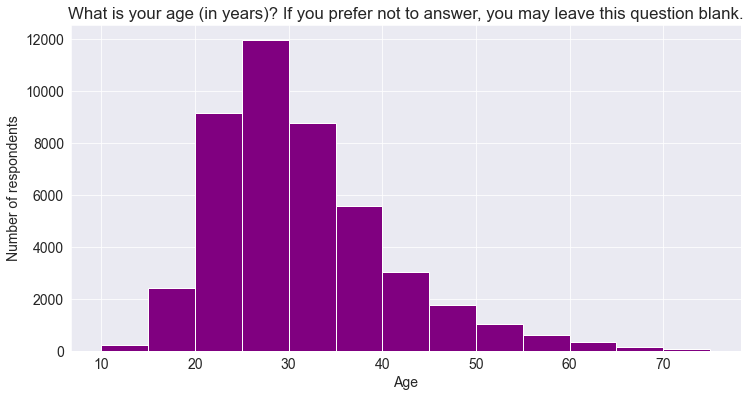

In [46]:
plt.figure(figsize=(12, 6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple');

It appears that a large percentage of respondents are 20-45 years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.

We can filter out the responses by age group in order to see how the survey results vary for different ages. In this case we'll create 6 categories: `Less than 10 years`, `10-18 years`, `18-30 years`, `30-45 years`, `45-60 years` and `Older than 60 years` . Therefore we'll create 7 bins and use `pd.cut` to create the new column `AgeGroup`.

In [47]:
bins = [0,10, 18, 30, 45, 60,61]
labels = ['Less than 10 years', '10-18 years', '18-30 years', '30-45 years', '45-60 years', 'Older than 60 years']
merged_df['AgeGroup'] = pd.cut(merged_df['Age'], bins=bins, labels=labels)

For the different age groups we can investigate if the average working hours differ in any way, we can do this by finding the average for the `WorkWeekHrs` column for each age group and comparing it to the others.

In [48]:
work_hours_18_30 = merged_df[merged_df.AgeGroup == '18-30 years'].WorkWeekHrs.mean()
work_hours_30_45 = merged_df[merged_df.AgeGroup == '30-45 years'].WorkWeekHrs.mean()
work_hours_45_60 = merged_df[merged_df.AgeGroup == '45-60 years'].WorkWeekHrs.mean()

print(f"Average work hours for 18-30 years is: {round(work_hours_18_30, 2)}\nAverage work hours for 30-45 years is: {round(work_hours_30_45,2)}\nAverage work hours for 45-60 years is: {round(work_hours_45_60,2)}")

Average work hours for 18-30 years is: 39.44
Average work hours for 30-45 years is: 40.65
Average work hours for 45-60 years is: 41.75


It seems from this data that on average 18-30 year olds work about an 1 hour less than 30-45 year olds, and strangely 45-60 year olds work an extra hour compared to the standard 40 hour work week and an extra 2 hours compared to 18-30 year olds.

### Gender

Let's look at the distribution of responses for Gender. It's a well-known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.

In [49]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [50]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

A pie chart would be a great way to visualize the distribution.

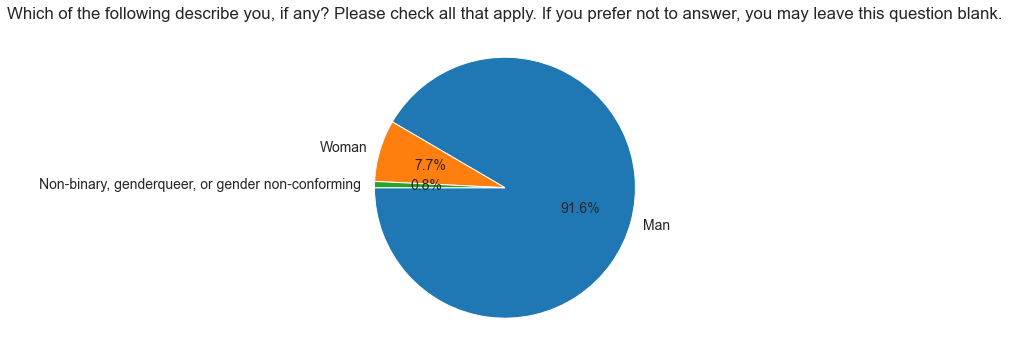

In [51]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the programming community - which is estimated to be around 12%.

### Education Level

Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.

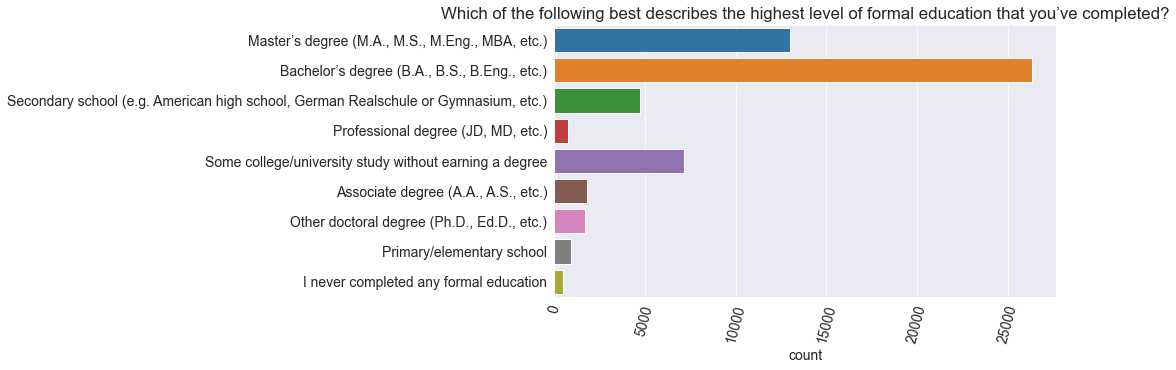

In [52]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.

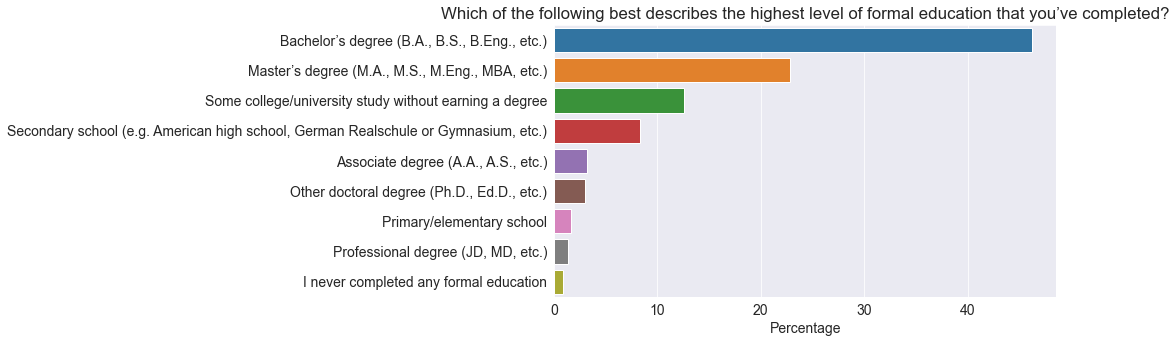

In [53]:
ed_level_pct = survey_df.EdLevel.value_counts() * 100 / survey_df.EdLevel.count()

sns.barplot(x=ed_level_pct, y=ed_level_pct.index)

plt.title(schema.EdLevel)
plt.ylabel(None);
plt.xlabel('Percentage');

We can modify the barplot above to show the percentages for each Education level. More than 40% of the respondents hold a Bachelor's degree and a quarter have attained a Master's degree, over 60% of respondents therefore have achieved a higher education qualification.

It would be interesting to compare survey responses and preferences across genders, for example how relative education levels differ across genders. We can create two seperate data frames for the two gender's `Man` and `Woman` and visualize the differences.

In [54]:
survey_male_df = survey_df[survey_df['Gender'] == 'Man']
survey_female_df = survey_df[survey_df['Gender'] == 'Woman']

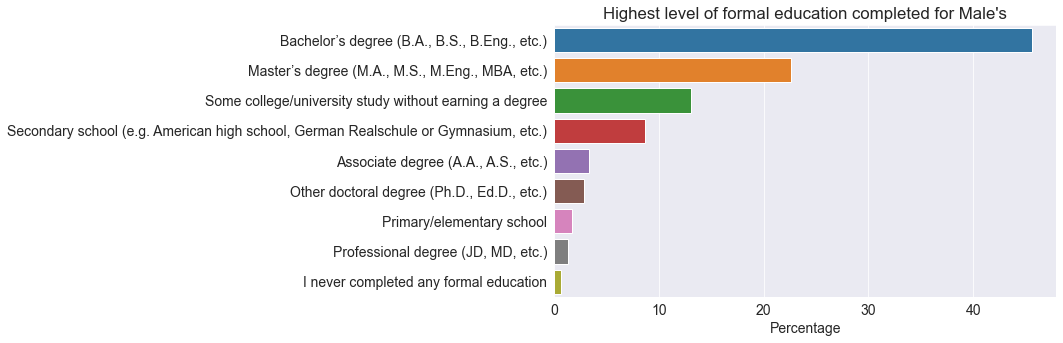

In [55]:
ed_level_male = survey_male_df.EdLevel.value_counts() * 100 / survey_male_df.EdLevel.count()

sns.barplot(x=ed_level_male, y=ed_level_male.index)

plt.title("Highest level of formal education completed for Male's")
plt.ylabel(None);
plt.xlabel('Percentage');

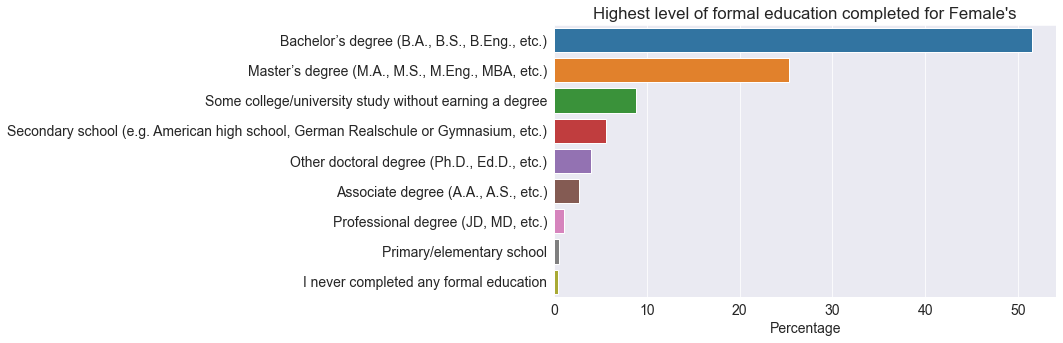

In [56]:
ed_level_female = survey_female_df.EdLevel.value_counts() * 100 / survey_female_df.EdLevel.count()

sns.barplot(x=ed_level_female, y=ed_level_female.index)

plt.title("Highest level of formal education completed for Female's")
plt.ylabel(None);
plt.xlabel('Percentage');

The two barplots for both genders are virtually the same, some minor differences are that a greater percentage of women completed a bachelors degree (more than 50%) and a lower proportion of women attended college/university without earning a degree in comparison to men who have a higher percentage for this category. 

In [57]:
schema.UndergradMajor

'What was your primary field of study?'

We might assume that most correspondnets completed their studies in Computer Science but it may be useful to visualize the different fields of study.

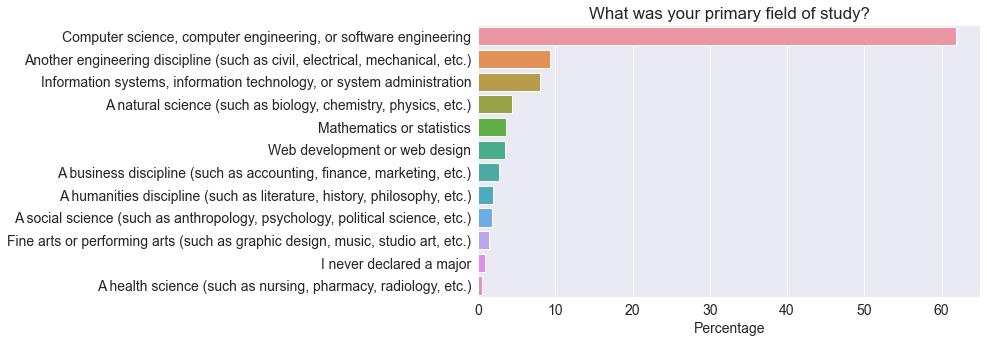

In [58]:
undergrad_pct = survey_df.UndergradMajor.value_counts() * 100 / survey_df.UndergradMajor.count()

sns.barplot(x=undergrad_pct, y=undergrad_pct.index)

plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

It turns out that slightly under 40% of programmers hold a college degree in a field of study other than computer science - which is very encouraging. It seems to suggest that while a college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer.

In [59]:
schema.NEWEdImpt

'How important is a formal education, such as a university degree in computer science, to your career?'

An interesting column to explore would be `NEWEDImpt` and more specifically if opinions differ among respondents who hold a higher education qualification compared to those who do not. We can filter out all the respondents who have a higher education qualification and those who do not into two seperate data frames.


In [60]:
higher_education_df = survey_df.loc[(survey_df['EdLevel'] == 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)') | (survey_df['EdLevel'] == 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)')]  
non_higher_education_df = survey_df[~survey_df.EdLevel.isin(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'])]

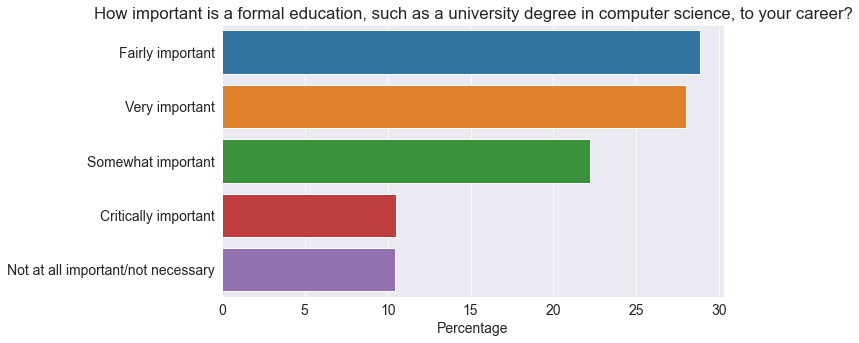

In [61]:
higher_education_pct = higher_education_df.NEWEdImpt.value_counts() * 100 / higher_education_df.NEWEdImpt.count()

sns.barplot(x=higher_education_pct, y=higher_education_pct.index)

plt.title(schema.NEWEdImpt)
plt.ylabel(None);
plt.xlabel('Percentage');

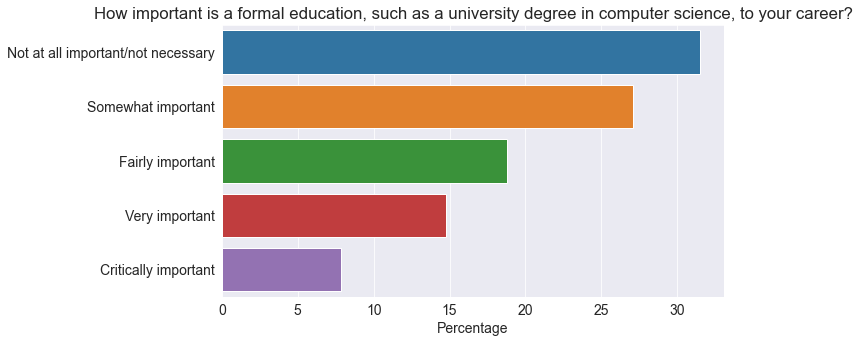

In [62]:
non_higher_education_pct = non_higher_education_df.NEWEdImpt.value_counts() * 100 / non_higher_education_df.NEWEdImpt.count()

sns.barplot(x=non_higher_education_pct, y=non_higher_education_pct.index)

plt.title(schema.NEWEdImpt)
plt.ylabel(None);
plt.xlabel('Percentage');

The difference in opinion on the topic of how important formal education is to your career should not be very surprising. About a third of respondents who have not completed a higher education qualification (Bachelor's or Master's) feel that is not at all imporant or necessary to their career, this is almost completely the opposite as the majority of correspondents with a formal education feel that it is fairly important or very important to their career. The difference in opinion is quite obvious and mostly comes down to individual experiences with almost twice as many respondents who are formally educated believe that a formal education is very important to their careers as opposed to those with no formal education. We may assume that many of the non formally educated respondents are self taught and have managed to pursue careers in programming without the need of a formal education. 

### Employment

Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. Let's visualize the data from the `Employment` column.

In [63]:
schema.Employment

'Which of the following best describes your current employment status?'

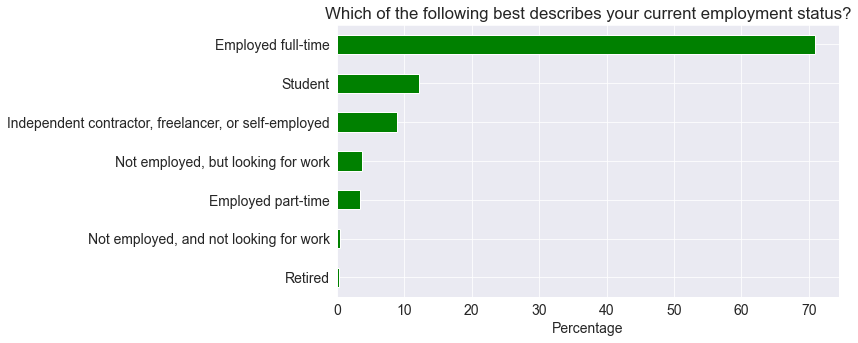

In [64]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

It appears that close to 10% of respondents are employed part time or as freelancers. The majority of correspondents are employed full time, students make up the second most significant percentage with about 12% of all responses.

The `DevType` field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by a semi-colon `;`, making it a bit harder to analyze directly.

In [65]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [66]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                           4396
Developer, back-end                                                                                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                                                                                       1465
Developer, front-end

Let's define a helper function that turns a column containing lists of values (like `survey_df.DevType`) into a data frame with one column for each possible option.

In [67]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [68]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [69]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The `dev_type_df` has one column for each option that can be selected as a response. If a respondent has chosen an option, the corresponding column's value is `True`. Otherwise, it is `False`.

We can now use the column-wise totals to identify the most common roles.


In [70]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

As one might expect, the most common roles include "Developer" in the name.

We can figure out the perecentage of respondents that work in roles related to data science, from the list of of dev types we can see that `Data or business analyst`, `Data scientist or machine learning specialist` and `Engineer, data` are all Data Science related roles.

In [71]:
total_roles = dev_type_totals.sum()
total_roles

155571

In [72]:
data_science_roles = (dev_type_df[['Data or business analyst','Data scientist or machine learning specialist', 'Engineer, data']].sum(axis=1).sum())
data_science_roles

11609

In [73]:
percentage_of_ds = (data_science_roles / total_roles)*100
percentage_of_ds

7.462187682794351

Only about 7% of all the respondents work in a Data Science related role, with more traditional programming roles such as back end, front end,full stack, desktop and mobile developer being the most popular jobs among survey participants.  

## Asking and Answering Questions

We've already gained several insights about the respondents and the programming community by exploring individual columns of the dataset. Let's ask some specific questions and try to answer them using data frame operations and visualizations.

#### Q: What are the most popular programming languages in 2020? 

To answer, this we can use the `LanguageWorkedWith` column. Similar to `DevType`, respondents were allowed to choose multiple options here.

In [74]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

First, we'll split this column into a data frame containing a column of each language listed in the options.

In [75]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [76]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


It appears that a total of 25 languages were included among the options. Let's aggregate these to identify the percentage of respondents who selected each language.


In [77]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

We can plot this information using a horizontal bar chart.

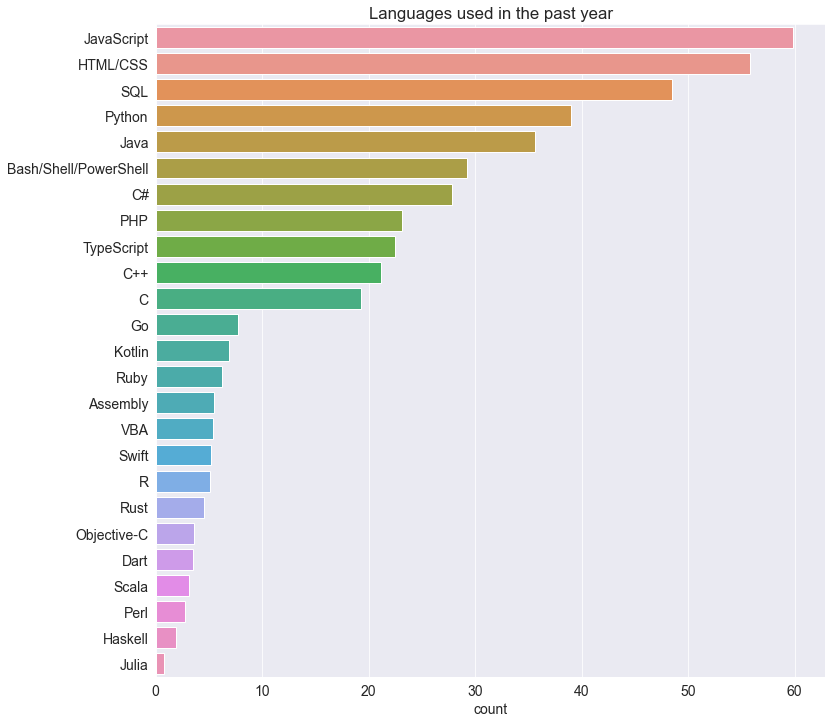

In [78]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

Perhaps unsurprisingly, Javascript & HTML/CSS comes out at the top as web development is one of today's most sought after skills. It also happens to be one of the easiest to get started. SQL is necessary for working with relational databases, so it's no surprise that most programmers work with SQL regularly. Python seems to be the popular choice for other forms of development, beating out Java, which was the industry standard for server & application development for over two decades.

#### Q: What are the most common programming languages in 2020 among respondents who do not describe themselves as "Developer, front-end"? 

As we already established th most common languages in 2020 seem to be mainly utilised for web development specifically front end developer roles, however we can also explore the most popular programming languages excluding front end developer respondents, to see how popular HTML, CSS and Javascript among other programming jobs.

First we can define a new data frame that contains all the respondents who do not describe themselves as `Developer, front-end` for the `DevType` column, then we will repeat the same process as before and plot the percentages for each programming language.

In [79]:
non_front_end_df = survey_df[~survey_df['DevType'].str.contains("Developer, front-end", na=False)]

In [80]:
languages_non_front_end = split_multicolumn(non_front_end_df.LanguageWorkedWith)

In [81]:
languages_non_front_end_perct = languages_non_front_end.mean().sort_values(ascending=False) * 100

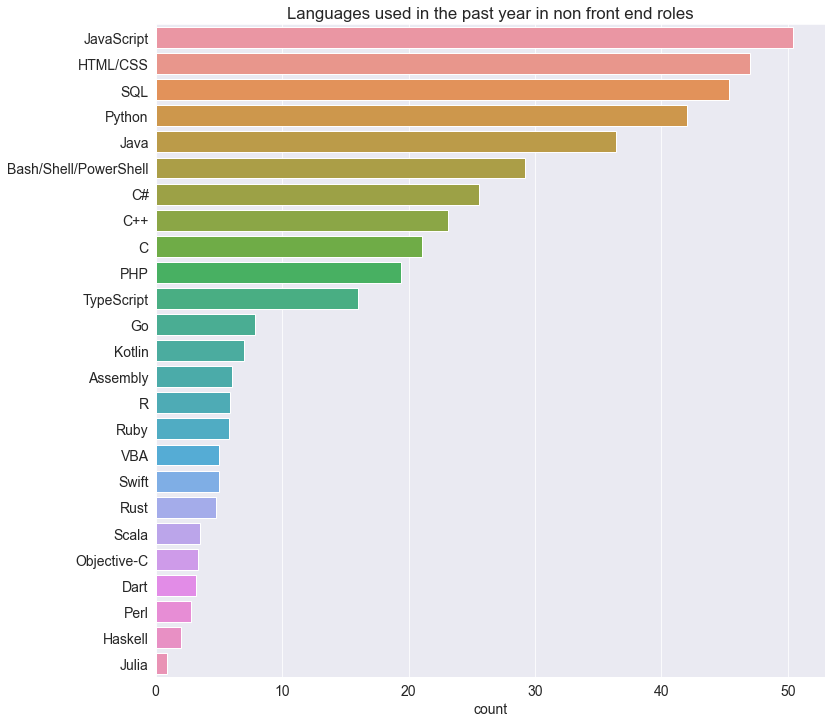

In [82]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_non_front_end_perct, y=languages_non_front_end_perct.index)
plt.title("Languages used in the past year in non front end roles");
plt.xlabel('count');

Even when excluding front end roles we can still see how popular these front end technologies are as they still remain in the top three, however Python and Java are not too far behind with more than a third of respondents using Java in the past year and over 40% for Python.

#### Q: What are the most common languages among respondents who work in fields related to data science?

To answer this question we will create a data frame that only contains `Data or business analyst` , `Data scientist or machine learning specialist` and `Engineer, data` for the `DevType` column.

In [83]:
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

In [84]:
data_science_df = survey_df[survey_df['DevType'].isin(['Data or business analyst', 'Data scientist or machine learning specialist', 'Engineer, data'])]

In [85]:
data_science_languages_df = split_multicolumn(data_science_df.LanguageWorkedWith)

In [86]:
languages_worked_data_science_perct = data_science_languages_df.mean().sort_values(ascending=False) * 100

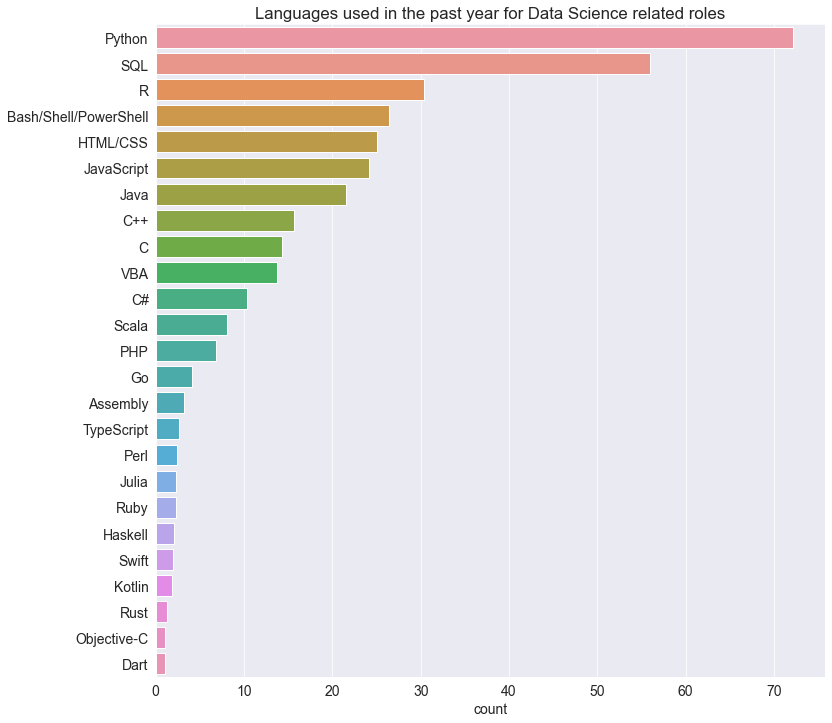

In [87]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_data_science_perct, y=languages_worked_data_science_perct.index)
plt.title("Languages used in the past year for Data Science related roles");
plt.xlabel('count');

we might have expected to see the majority of respondents that work in Data Science related roles to be using Python. This could be due to Python's ease of use which in turn makes it accessible, it also enables developers to roll out programs and get prototypes running. Additionally there are 70,000 libraries in the Python Package Index with the number continuing to grow. SQL is also commonly used among data scientist's as an important tool for updating, inserting, manipulating and modifying data. Another common language for data science is R, which seems to be much less used than Python. Language preference for completing the same task may often come down to personal preference but scalability, Jupyter notebooks, library packages, integrations and cross-functionality are a few reasons why some data scienetists may prefer Python over R.

#### Q: Which languages are people most interested in to learn over the next year?

For this, we can use the `LanguageDesireNextYear` column, with similar processing as the previous one.

In [88]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

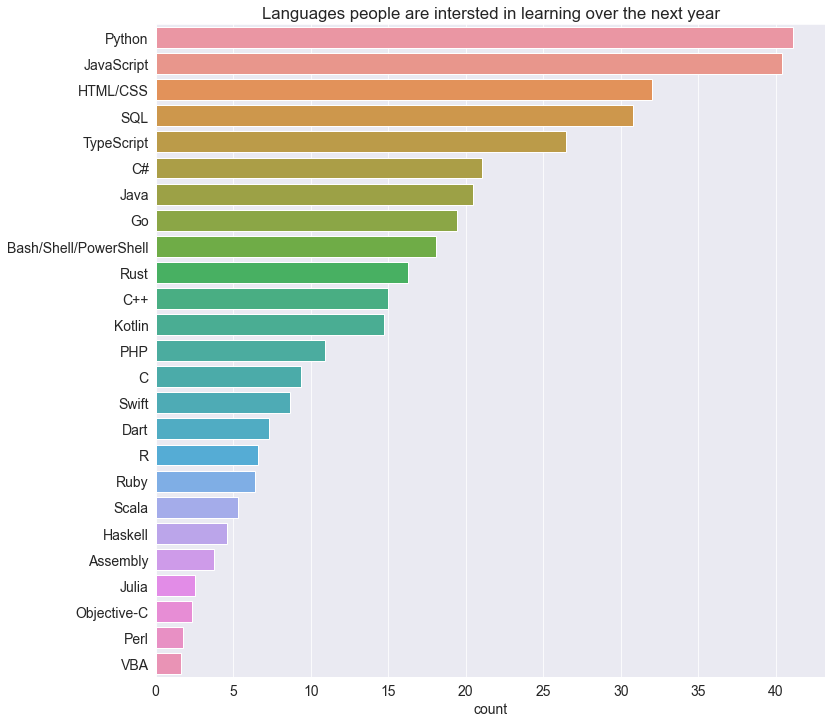

In [89]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

Once again, it's not surprising that Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for a variety of domains: application development, numerical computing, data analysis, machine learning, big data, cloud automation, web scraping, scripting, etc. 

#### Q:  Which are the most loved languages, i.e., a high percentage of people who have used the language want to continue learning & using it over the next year?

While this question may seem tricky at first, it's straightforward to solve using Pandas array operations. Here's what we can do:

- Create a new data frame `languages_loved_df` that contains a `True` value for a language only if the corresponding values in `languages_worked_df` and `languages_interested_df` are both `True`
- Take the column-wise sum of `languages_loved_df` and divide it by the column-wise sum of `languages_worked_df` to get the percentage of respondents who "love" the language
- Sort the results in decreasing order and plot a horizontal bar graph

In [90]:
languages_loved_df = languages_worked_df & languages_interested_df

In [91]:
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

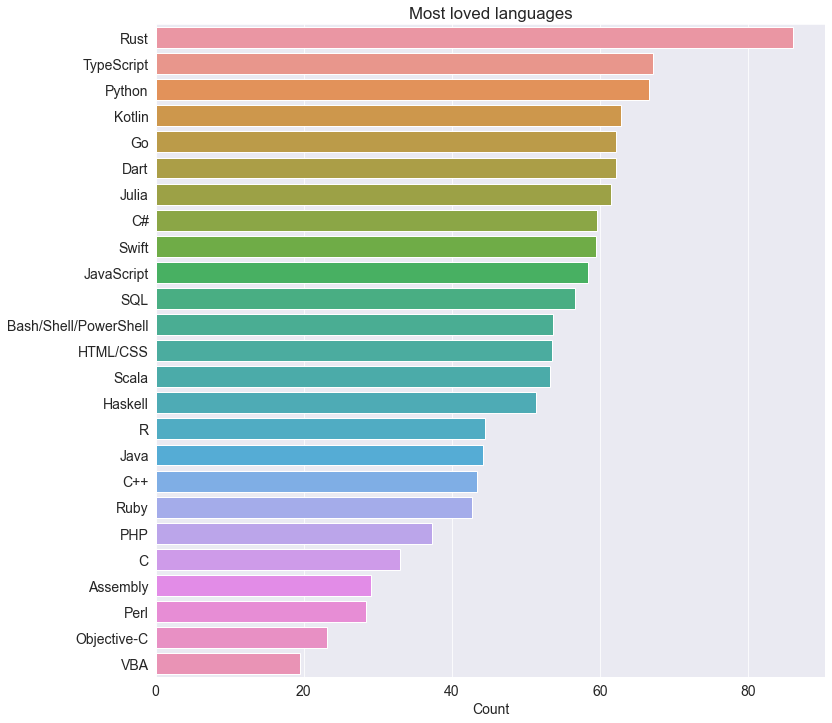

In [92]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('Count');

[Rust](https://www.rust-lang.org) has been StackOverflow's most-loved language for [four years in a row](https://stackoverflow.blog/2020/01/20/what-is-rust-and-why-is-it-so-popular/). This could be due to Rust's speed, safety and efficiency as well as it's thorough documentation and growing community. The second most-loved language is TypeScript, a popular alternative to JavaScript for web development.

Python features at number 3, despite already being one of the most widely-used languages in the world. Python has a solid foundation, is easy to learn & use, has a large ecosystem of domain-specific libraries, and a massive worldwide community.

#### Q:  Which are the most dreaded languages? i.e., a high percentage of people who have used a language in the past year but do not want to learn/use over the next year

In [93]:
languages_dreaded_df = ~languages_interested_df
languages_dreaded = (languages_dreaded_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

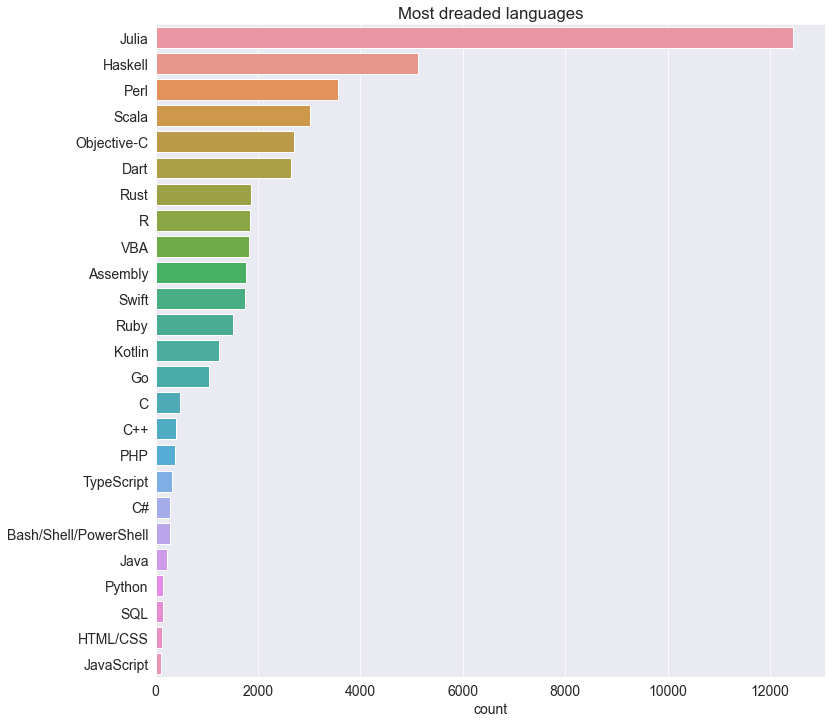

In [105]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_dreaded, y=languages_dreaded.index)
plt.title("Most dreaded languages");
plt.xlabel('count');

It seems that overwhelmingly Julia is the most dreaded language, a few reasons for this are that user's have reported that packages are not mature enough, it's too slow to generate a first plot, it has slow compile times and error messages are not very helpful.

#### Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

To answer this question, we'll need to use the `groupby` data frame method to aggregate the rows for each country. We'll also need to filter the results to only include the countries with more than 250 respondents.

In [95]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [96]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [97]:
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


The Asian countries like Iran, China, and Israel have the highest working hours, followed by the United States. However, there isn't too much variation overall, and the average working hours seem to be around 40 hours per week.

#### Q: How do the average work hours compare across continents?

In order to answer this question we will need to upload another data set called `countries.csv` that contains data about the continent that each country is located in.

In [98]:
countries_df = pd.read_csv('countries.csv')
countries_df

,Country,Continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa
...,...,...
205,Vietnam,Asia
206,Western Sahara,Africa
207,Yemen,Asia
208,Zambia,Africa


We can now create another data frame which is the result of merging our original `survey_df` data frame and the `countries_df` data frame that we just loaded. 

In [99]:
continents_df = survey_df.merge(countries_df, on='Country')
continents_work_hours = continents_df.groupby('Continent')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)
continents_work_hours

,WorkWeekHrs
Continent,
North America,41.472749
Asia,40.482526
Oceania,39.951056
Europe,39.173291
Africa,38.734334
South America,38.387286


Again the continents all seem to be in close agreement with the common 40 hour week around the world, with a 1-2 hour variation between some continents. 

#### Q: How important is it to start young to build a career in programming?

Let's create a scatter plot of `Age` vs. `YearsCodePro` (i.e., years of coding experience) to answer this question.

In [100]:
schema.YearsCodePro

'NOT including education, how many years have you coded professionally (as a part of your work)?'

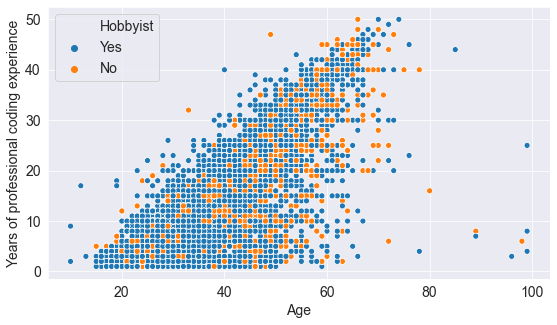

In [101]:
sns.scatterplot(x='Age', y='YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

You can see points all over the graph, which indicates that you can **start programming professionally at any age**. Many people who have been coding for several decades professionally also seem to enjoy it as a hobby.

We can also view the distribution of the `Age1stCode` column to see when the respondents tried programming for the first time.

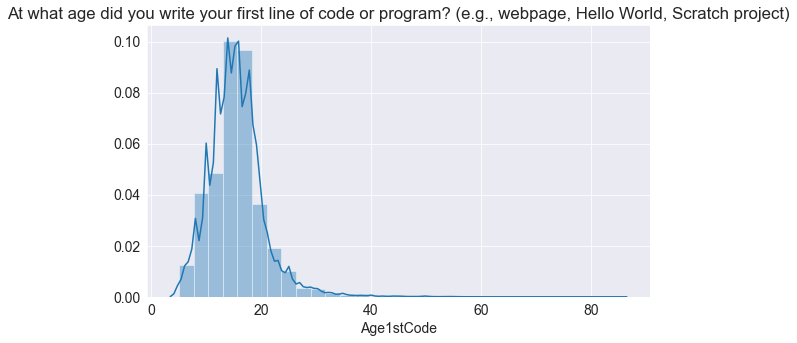

In [104]:
plt.title(schema.Age1stCode)
sns.distplot(survey_df.Age1stCode, bins=30, kde=True);

As you might expect, most people seem to have had some exposure to programming before the age of 40. However, but there are people of all ages and walks of life learning to code.

## Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:

- Based on the survey respondents' demographics, we can infer that the survey is somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries and women & non-binary genders.

- Majority of correspondents were from English speaking countries (~60%) with Non-English speaking programmers being underrepresented in the survey.

- The programming community is not as diverse as it can be. Although things are improving, we should make more efforts to support & encourage underrepresented communities, whether in terms of age, country, race, gender, or otherwise.

- Although most programmers hold a college degree, a reasonably large percentage did not have computer science as their college major. Hence, a computer science degree isn't compulsory for learning to code or building a career in programming.

- The majority of programmers who do not hold a higher education qualification (Bachelor's/Master's) believe that a formal education is either not at all important/necessary or only somewhat important to their career.

- In contrast most respondents with a formal education beleive it is farirly important or very important to their career. 

- On average more females achieved a Bachelor’s or Master’s qualification compared to males, females were also more likely to attend college and earn a degree as oppose to leaving with no qualification.


- A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field, especially when you're just getting started.

- Javascript & HTML/CSS are the most used programming languages in 2020, closely followed by SQL & Python.

- Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for various domains.

- Python is the most commonly used language for data science related roles followed by SQL which is primarily used for relational databases.

- Only about 7% of correspondents work in roles related to Data Science as this is still a growing field and other developer jobs such as web, mobile and desktop roles are still more common. 

- Rust and TypeScript are the most "loved" languages in 2020, both of which have small but fast-growing communities. Python is a close third, despite already being a widely used language.

- Julia is the most dreaded language, i.e. the language that participants have used in the past year and do not want to use or learn in the coming year. 

- Programmers worldwide seem to be working for around 40 hours a week on average, with slight variations by country and continent.

- You can learn and start programming professionally at any age. You're likely to have a long and fulfilling career if you also enjoy programming as a hobby.


## References

The following resources may be helpful to learn more about the dataset and tools used in this notebook:

- Stack Overflow Developer Survey: https://insights.stackoverflow.com/survey
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- `opendatasets` Python library: https://github.com/JovianML/opendatasets